In [1]:
import os
import numpy as np
import pandas as pd
import random
os.chdir('/Users/alexaowen/Documents/Grad School/Summer 2023/DS 5001/amo9f_ds5100_montecarlo')

In [2]:
!cd amo9f_ds5100_montecarlo/; pip install .

zsh:cd:1: no such file or directory: amo9f_ds5100_montecarlo/
Processing /Users/alexaowen/Documents/Grad School/Summer 2023/DS 5001/amo9f_ds5100_montecarlo
  Created wheel for montecarlo: filename=montecarlo-1.0.0-py3-none-any.whl size=4895 sha256=3bcac24a10ed42271b37ca42d6c693c4e8ebd30f6ab5a9a1e58036a4e7d57dcf
  Stored in directory: /private/var/folders/25/grnx6tdd3znb3dp0djqfb4hr0000gn/T/pip-ephem-wheel-cache-tskfdk9c/wheels/38/fa/35/33d9e337e0ed2013eac642383015f850403efce139af47e330
Successfully built montecarlo
  Attempting uninstall: montecarlo
    Found existing installation: montecarlo 1.0.0
    Uninstalling montecarlo-1.0.0:
      Successfully uninstalled montecarlo-1.0.0


In [3]:
from montecarlo import Die, Game, Analyzer

## Scenario 1
### Set-Up

In [4]:
coin = np.array(['H', 'T'])
d1= Die(coin)
d1.show_df()

,Weights
H,1.0
T,1.0


In [5]:
d2 = Die (coin)
d2.adj_weights ('H', 5)
d2.show_df()

,Weights
H,5.0
T,1.0


### Game 1

In [6]:
g1 = Game([d1,d1])
g1.play(1000)
g1.recent_play()

,Die_0,Die_1
0,H,H
1,T,H
2,T,T
3,H,H
4,H,T
...,...,...
995,H,T
996,H,H
997,T,T
998,H,T


In [7]:
a1 = Analyzer(g1)
jp_count = a1.jackpot()
print(jp_count)
jp_freq = jp_count/len(g1.recent_play())*100
print(jp_freq,'%')

526
52.6 %


### Game 2

In [8]:
g2 = Game([d1,d2,d2])
g2.play(1000)
g2.recent_play('narrow')

,,value
index,variable,
0,Die_0,T
1,Die_0,T
2,Die_0,H
3,Die_0,H
4,Die_0,H
...,...,...
995,Die_2,H
996,Die_2,H
997,Die_2,H


In [9]:
a2 = Analyzer(g2)
jp_count2 = a2.jackpot()
print(jp_count2)
jp_freq2 = jp_count2/len(g2.recent_play())*100
print (jp_freq2,'%')

358
35.8 %


### Bar Chart

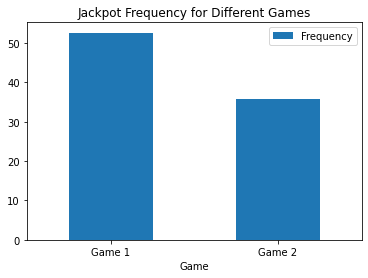

In [10]:
df = pd.DataFrame({'Game':['Game 1', 'Game 2'], 'Frequency':[jp_freq, jp_freq2]})
ax = df.plot.bar(x='Game', y='Frequency', title = 'Jackpot Frequency for Different Games', rot = 0)

## Scenario 2

### Set-Up

In [11]:
die = np.array([1,2,3,4,5,6])
d1 = Die(die)
d2 = Die(die)
d3 = Die(die)

d1.adj_weights (6, 5)
d1.show_df()

,Weights
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,5.0


In [12]:
d2.adj_weights (1, 5)
d2.show_df()

,Weights
1,5.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0


In [13]:
d3.show_df()

,Weights
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0


### Game 1: 5 Fair Die

In [14]:
g1 = Game ([d3,d3,d3,d3,d3])
g1.play(10000)
g1.recent_play()

,Die_0,Die_1,Die_2,Die_3,Die_4
0,4,5,3,2,1
1,2,6,4,4,3
2,3,2,1,1,6
3,5,6,4,3,6
4,3,4,1,4,6
...,...,...,...,...,...
9995,2,5,1,2,2
9996,5,2,1,2,3
9997,6,5,4,3,2
9998,6,4,5,6,5


In [15]:
a1 = Analyzer(g1)
print(a1.jackpot())
jp_freq = a1.jackpot()/len(g1.recent_play())*100
print(jp_freq)

11
0.11


In [16]:
a1.combo_count().head(10)

count
Die_0 Die_1 Die_2 Die_3 Die_4       
1     3     4     5     6        169
      2     3     4     6        158
                  5     6        152
            4     5     6        149
            3     4     5        146
2     3     4     5     6        145
1     1     2     3     6         96
      2     3     3     5         92
2     3     3     4     5         91
1     2     3     3     4         90

### Game 2: 2 Unfair Die, 3 Fair Die

In [17]:
g2 = Game ([d1,d2,d3,d3,d3])
g2.play(10000)
g2.recent_play()

,Die_0,Die_1,Die_2,Die_3,Die_4
0,2,1,5,1,6
1,6,5,4,1,4
2,5,2,3,5,3
3,6,3,4,2,5
4,6,1,4,3,1
...,...,...,...,...,...
9995,1,6,4,3,4
9996,6,1,4,1,3
9997,4,1,1,2,4
9998,4,3,2,6,6


In [18]:
a2 = Analyzer(g2)
print(a2.jackpot())
jp_freq2 = a2.jackpot()/len(g2.recent_play())*100
print(jp_freq2)

11
0.11


In [19]:
a2.combo_count().head(10)

count
Die_0 Die_1 Die_2 Die_3 Die_4       
1     2     4     5     6        207
            3     5     6        187
      3     4     5     6        180
      2     3     4     6        169
      1     3     4     6        158
      4     5     6     6        156
      3     4     6     6        151
      1     2     3     6        142
                  5     6        138
      2     4     6     6        136

### Jackpot Bar Chart

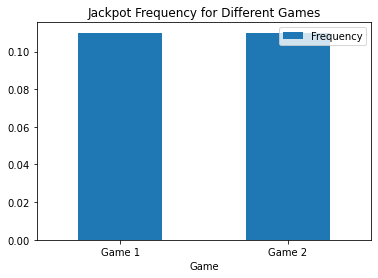

In [20]:
df = pd.DataFrame({'Game':['Game 1', 'Game 2'], 'Frequency':[jp_freq, jp_freq2]})
ax = df.plot.bar(x='Game', y='Frequency', title = 'Jackpot Frequency for Different Games', rot = 0)

## Scenario 3
### Set-Up

In [57]:
weights = pd.read_csv('english_letters.txt', sep=" ", header= None)
scrabble = pd.read_csv('scrabble_words.txt', header= None)
scrabble = scrabble.rename(columns = {0: 'words'})

In [58]:
letters = weights[0].tolist()
weights = weights[1].tolist()

d= Die(np.array(letters))

for i, face in enumerate(letters):
    d.adj_weights(face, weights[i])
    
d.show_df()

,Weights
E,529117365.0
T,390965105.0
A,374061888.0
O,326627740.0
I,320410057.0
N,313720540.0
S,294300210.0
R,277000841.0
H,216768975.0
L,183996130.0


### 4 Die

In [59]:
g1 = Game ([d,d,d,d])
g1.play(1000)
g1.recent_play()

,Die_0,Die_1,Die_2,Die_3
0,G,T,C,A
1,N,O,H,T
2,I,T,E,I
3,H,F,H,R
4,E,I,C,S
...,...,...,...,...
995,R,A,N,H
996,A,B,R,D
997,O,E,E,F
998,W,A,I,T


In [60]:
a1 = Analyzer (g1)
perm1 = a1.perm_count()
perm1

count
Die_0 Die_1 Die_2 Die_3       
T     T     R     A          3
S     O     N     N          2
N     O     A     N          2
E     E     G     T          2
B     C     O     V          2
...                        ...
G     E     A     Y          1
            H     I          1
            O     T          1
      G     E     W          1
Y     O     E     R          1

[992 rows x 1 columns]

In [61]:
l1 = []
for e in list(perm1.index):
    l1.append(''.join(e))
    
df1 = pd.DataFrame({'perm':l})
df1

,perm
0,NEFR
1,TIIH
2,OEEO
3,TDET
4,SNGT
...,...
988,HGRL
989,HHGR
990,HHHM
991,HHOI


In [62]:
words_both1 = df1.perm.isin(scrabble.words).sum()
words_both1

54

### 5 Die

In [63]:
g2 = Game ([d,d,d,d,d])
g2.play(1000)
g2.recent_play()

,Die_0,Die_1,Die_2,Die_3,Die_4
0,T,S,L,E,N
1,I,E,O,M,S
2,S,E,E,C,N
3,N,L,E,E,W
4,A,H,R,M,E
...,...,...,...,...,...
995,E,H,Y,M,A
996,A,O,I,P,T
997,O,T,E,R,I
998,I,D,E,E,V


In [64]:
a2 = Analyzer (g2)
perm2 = a2.perm_count()
perm2

count
Die_0 Die_1 Die_2 Die_3 Die_4       
A     A     D     S     D          1
O     W     I     N     F          1
      S     U     T     C          1
      T     A     E     F          1
                        S          1
...                              ...
H     I     P     E     O          1
            R     T     B          1
            T     E     E          1
                  G     A          1
Z     B     U     T     C          1

[1000 rows x 1 columns]

In [66]:
l2 = []
for e in list(perm2.index):
    l2.append(''.join(e))
    
df2 = pd.DataFrame({'perm':l2})
df2

,perm
0,AADSD
1,OWINF
2,OSUTC
3,OTAEF
4,OTAES
...,...
995,HIPEO
996,HIRTB
997,HITEE
998,HITGA


In [67]:
words_both2 = df2.perm.isin(scrabble.words).sum()
words_both2

11